# Task 1

In [35]:
import pandas as pd

import matplotlib.pyplot as plt

In [36]:
wine = pd.read_csv("/content/drive/MyDrive/UoR/spring/Artificial Intelligence and Machine Learning/Lab/Lab3/CS3AI18_CSMAI21_lab2_wine.csv", index_col = "Unnamed: 0")

In [37]:
wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type,quality_ind
1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White,Low
2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White,Low
3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White,Low
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White,Low
5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White,Low


## 1)

### EDA

In [38]:
wine.dtypes

fixed.acidity           float64
volatile.acidity        float64
citric.acid             float64
residual.sugar          float64
chlorides               float64
free.sulfur.dioxide     float64
total.sulfur.dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
quality_ind              object
dtype: object

In [39]:
wine.count()

fixed.acidity           6497
volatile.acidity        6497
citric.acid             6497
residual.sugar          6497
chlorides               6497
free.sulfur.dioxide     6497
total.sulfur.dioxide    6497
density                 6497
pH                      6497
sulphates               6497
alcohol                 6497
quality                 6497
type                    6497
quality_ind             6497
dtype: int64

In [40]:
wine.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### visualisation

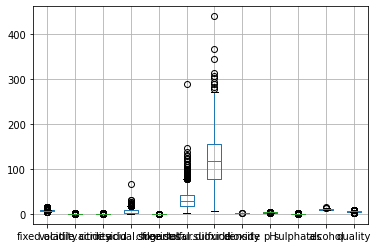

In [41]:
boxplot = wine.drop(labels=['type','quality_ind'], axis='columns').boxplot()

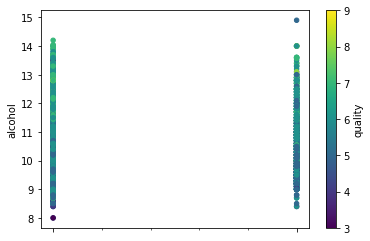

In [42]:
ax = wine.plot.scatter(x='type',
            y='alcohol',
            c='quality',
            colormap='viridis')

## 2)

In [43]:
wine_nostr = wine.drop(labels=['type','quality_ind'], axis='columns')

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler()

In [46]:
print(scaler.fit(wine_nostr))

MinMaxScaler()


In [47]:
print(scaler.data_max_)

[ 15.9       1.58      1.66     65.8       0.611   289.      440.
   1.03898   4.01      2.       14.9       9.     ]


In [48]:
print(scaler.transform(wine_nostr))

[[0.26446281 0.12666667 0.21686747 ... 0.12921348 0.11594203 0.5       ]
 [0.20661157 0.14666667 0.20481928 ... 0.15168539 0.2173913  0.5       ]
 [0.3553719  0.13333333 0.24096386 ... 0.12359551 0.30434783 0.5       ]
 ...
 [0.20661157 0.28666667 0.07831325 ... 0.29775281 0.43478261 0.5       ]
 [0.17355372 0.37666667 0.07228916 ... 0.2752809  0.31884058 0.33333333]
 [0.18181818 0.15333333 0.28313253 ... 0.24719101 0.43478261 0.5       ]]


## 3.1

In [49]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [50]:
y = wine.iloc[:,-2]

In [51]:
y

1       White
2       White
3       White
4       White
5       White
        ...  
6493      Red
6494      Red
6495      Red
6496      Red
6497      Red
Name: type, Length: 6497, dtype: object

In [52]:
le.fit(y)

LabelEncoder()

In [53]:
le.classes_

array(['Red', 'White'], dtype=object)

In [54]:
label = le.transform(y)

In [55]:
label[:5]

array([1, 1, 1, 1, 1])

In [56]:
le.fit_transform(y)

array([1, 1, 1, ..., 0, 0, 0])

In [57]:
le.inverse_transform(label)

array(['White', 'White', 'White', ..., 'Red', 'Red', 'Red'], dtype=object)

In [58]:
wine.iloc[:,-2] = label

In [59]:
wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type,quality_ind
1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1,Low
2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1,Low
3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1,Low
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,Low
5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,Low


## 3.2

In [60]:
wine = pd.read_csv("/content/drive/MyDrive/UoR/spring/Artificial Intelligence and Machine Learning/Lab/Lab3/CS3AI18_CSMAI21_lab2_wine.csv", index_col = "Unnamed: 0")

In [61]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [62]:
enc.fit(wine.iloc[:,-2:])

OrdinalEncoder()

In [63]:
enc.categories_

[array(['Red', 'White'], dtype=object), array(['High', 'Low'], dtype=object)]

In [64]:
enc.transform(wine.iloc[:,-2:])

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [65]:
wine.iloc[:,-2:] = enc.transform(wine.iloc[:,-2:])

In [66]:
wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type,quality_ind
1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1.0,1.0
2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1.0,1.0
3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1.0,1.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1.0,1.0
5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1.0,1.0


# Task 2

In [68]:
airbnb = pd.read_csv("/content/drive/MyDrive/UoR/spring/Artificial Intelligence and Machine Learning/Lab/Lab3/CS3AI18_CSMAI21_lab3_airbnb.csv")

In [69]:
airbnb.head()

,ID,DATE_DIFF,GENDER,AGE,COUNTRY
0,lsw9q7uk0j,3,FEMALE,46.0,US
1,0d01nltbrs,10,FEMALE,47.0,US
2,a1vcnhxeij,206,FEMALE,50.0,US
3,yuuqmid2rp,2,FEMALE,36.0,US
4,v4d5rl22px,1,FEMALE,33.0,CA


In [80]:
airbnb.GENDER.value_counts(normalize=True)

0.5400814403768613

In [83]:
##  input: dataframe series
##  output: probability distribution
def calculate_P(dataframe_series):
  tmp = dataframe_series.value_counts(normalize=True)
  print("{" + str(tmp[0]) + ";" + str(tmp[1]) + "}")

In [84]:
calculate_P(airbnb.GENDER)

{0.5400814403768613;0.45991855962313866}


In [85]:
calculate_P(airbnb.ID)

{1.996087668170386e-05;1.996087668170386e-05}


# task 3

In [86]:
import pandas as pd

In [90]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None) 

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [96]:
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [97]:
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values

In [101]:
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state = 0)

In [102]:
sc = StandardScaler()

In [104]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [105]:
import numpy as np

In [106]:
cov_mat = np.cov(X_train_std.T)

In [113]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [118]:
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.8923083  2.46635032 1.42809973 1.01233462 0.84906459 0.60181514
 0.52251546 0.08414846 0.33051429 0.29595018 0.16831254 0.21432212
 0.2399553 ]


In [119]:
tot = sum(eigen_vals)

In [125]:
var_exp = [(i / tot) for 
           i in sorted(eigen_vals, reverse = True)]

In [126]:
cum_var_exp = np.cumsum(var_exp)

In [127]:
import matplotlib.pyplot as plt

<BarContainer object of 13 artists>

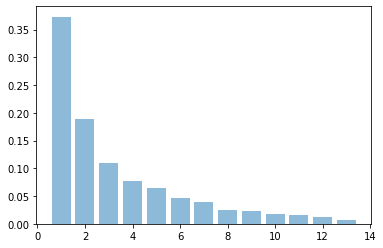

In [128]:
plt.bar(range(1,14), var_exp, alpha = 0.5, align='center',
        label='individual explained variance')